# Decision Trees — Quick Overview

A decision tree is a flow-chart–like model that splits the feature space into regions by asking a sequence of questions (feature ≤ threshold). It's easy to interpret and works for both classification and regression.

**Classifier:** predicts class labels. (`DecisionTreeClassifier`)

**Regressor:** predicts continuous values. (`DecisionTreeRegressor`)

Learns by recursively splitting data to make leaves that are as "pure" as possible.

## How splits are chosen (the math)

At each node the algorithm chooses a feature and a threshold that maximizes impurity reduction.

**Common impurity measures:**

### Gini impurity (classification)

$$G = 1 - \sum_{k} p_k^2$$

where $p_k$ is proportion of class $k$ in the node.

### Entropy / Information Gain (classification)

$$H = -\sum_{k} p_k \log_2 p_k$$

Information gain = parent_entropy − weighted_child_entropy.

### Variance / MSE (regression)
For regression we minimize squared error in child nodes (choose split reducing variance).

**Impurity reduction (gain) for split S → (S_left, S_right):**

$$\Delta = I(S) - \frac{|S_L|}{|S|} I(S_L) - \frac{|S_R|}{|S|} I(S_R)$$

Choose split with largest $\Delta$.

Scikit-learn uses **CART**: binary splits, produces one tree; supports `criterion='gini'/'entropy'` for classifier and `criterion='squared_error'` for regressor.

## Key hyperparameters (control complexity / prevent overfit)

- **max_depth** — maximum tree depth.
- **min_samples_split** — min samples required to split a node.
- **min_samples_leaf** — min samples in a leaf.
- **max_features** — features considered at each split (useful in ensembles).
- **ccp_alpha** — cost complexity pruning parameter (post-pruning).
- **criterion** — impurity measure (`'gini'`/`'entropy'`/`'squared_error'`).

In [8]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Generate dataset with CGPA and Package for 20 students
data = load_iris()
x, y = data.data, data.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

#data
print(x)
print(y)

(120, 4) (30, 4) (120,) (30,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
ddt = DecisionTreeClassifier(random_state=42)
ddt.fit(x_train, y_train)


DecisionTreeClassifier(random_state=42)

Accuracy: 1.00
Feature importances: [0.         0.01667014 0.90614339 0.07718647]


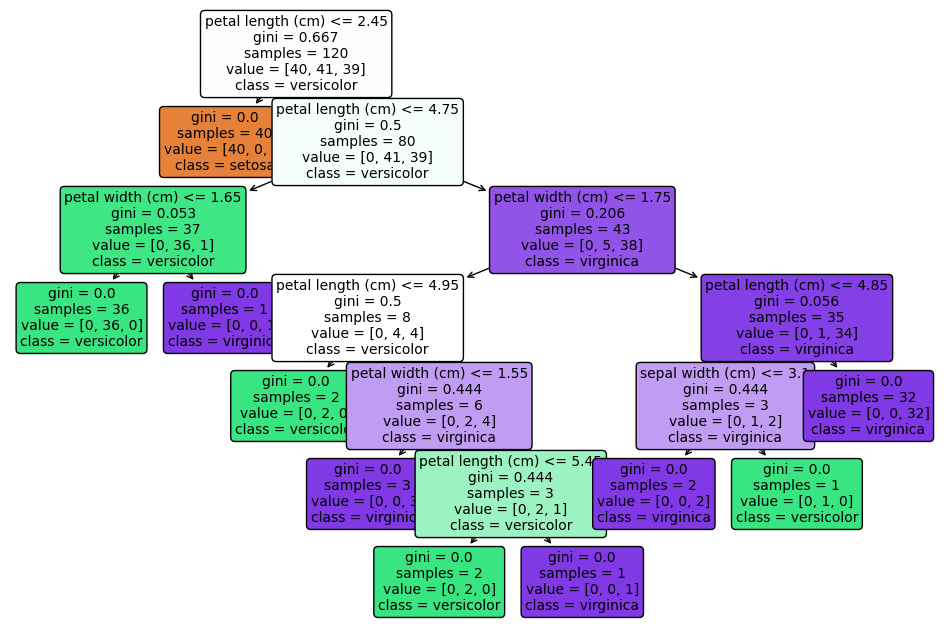

In [ ]:
y_pred = ddt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Feature importances:", ddt.feature_importances_)
# Visualize tree
plt.figure(figsize=(12,8))
plot_tree(ddt, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True, fontsize=10)
plt.show()


In [ ]:
param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.01, 0.02]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid,
                    cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(x_train, y_train)

print("Best params:", grid.best_params_)
best_dt = grid.best_estimator_
print("Test accuracy (best):", accuracy_score(y_test, best_dt.predict(x_test)))


Best params: {'ccp_alpha': 0.0, 'max_depth': 3, 'min_samples_leaf': 4}
Test accuracy (best): 1.0
